<h1><b><center> Cars4U Project </center></b></h1>

# Problems Statement

- In the Indian car market, there is a sinificant demand for used cars. The customers tend to purchase used or pre-owned cars instead of the new cars, and this trend has continued to grow as the sales of new cars are decreasing over the past years.

- We want to come up with a pricing model that can predict the price of used cars, and also help the business for the profitable strategies.



# Objective

- Perform an Exploratory Data Analysis, including data structure, univariate and bivirate analysis.
- Data pre-processing: treat missing values, outlier and feature engineering.
- Build linear regression model.
- Provide set of insights and recommendations for business.

# Data
**used_cars_data.csv** - the raw data contains information about used cars that sold in different locations.

- `S.No.`: Serial number
- `Name`: Name of the car which includes brand name and model name
- `Location`: Location in which the car is being sold or is available for purchase (cities)
- `Year`: Manufacturing year of the car
- `Kilometers_driven`: The total kilometers driven in the car by the previous owner(s) in km
- `Fuel_Type`: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- `Transmission`: The type of transmission used by the car (Automatic/Manual)
- `Owner`: Type of ownership
- `Mileage`: The standard mileage offered by the car company in kmpl or km/kg
- `Engine`: The displacement volume of the engine in CC
- `Power`: The maximum power of the engine in bhp
- `Seats`: The number of seats in the car
- `New_Price`: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
- `Price`: The price of the used car in INR Lakhs

### Import the necessary packages

In [1]:
# this will help in making the Python code more structured automatically
%load_ext nb_black

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
%matplotlib inline
plt.rc("figure", figsize=[10, 6])

import warnings

warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<IPython.core.display.Javascript object>

### Read the dataset

In [2]:
cars = pd.read_csv("used_cars_data.csv")

<IPython.core.display.Javascript object>

In [3]:
# copy the data to another variable to avoid overwritting the original data
data = cars.copy()

<IPython.core.display.Javascript object>

# Data background and contents - Data Structure Overview

In [4]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


<IPython.core.display.Javascript object>

- Based on observation, Mileage variable has two different units. However, both the units refer to the distance covered (in km) per unit of fuel. Hence, we can take out the units and don't have to convert.
- For New_Price column, there is a money unit. We can convert to numeric for easier analysis later on. Besides, this variable seems to have missing values. We will investigate further about this.
- For S.No. variable, we can drop this column and use default ID.
- For Engine and Power, we can take the unit out as well.

We will do the Exploratory Data Analysis (EDA) in order to investigate more.

### Understand the shape of the data

In [5]:
data.shape

(7253, 14)

<IPython.core.display.Javascript object>

- The data has 7253 rows, and 14 columns

### Check for duplicates

In [6]:
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There are no duplicate values in the dataset

### Check data types of all columns in the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


<IPython.core.display.Javascript object>

- Owner_Type, Transmission, Fuel_Type are object types. We can convert to categorical type.

### Fixing Data Types

In [8]:
data["Owner_Type"] = data["Owner_Type"].astype("category")
data["Transmission"] = data["Transmission"].astype("category")
data["Fuel_Type"] = data["Fuel_Type"].astype("category")

<IPython.core.display.Javascript object>

- Converting some variables to category helps to reduce the data space from the server memory

### Drop the S.No. Variable

In [9]:
data.drop(["S.No."], axis=1, inplace=True)

<IPython.core.display.Javascript object>

- S.No. variable is dropped since it does not provide much insights.

### Mileage Variable -  Remove unit

In [10]:
# This is a function to remove the unit in a variable:
def remove_unit(value):
    if isinstance(value, str):
        return float(value.split(" ")[0])
    else:
        return np.nan

<IPython.core.display.Javascript object>

- Since both units of Mileage (km/kg and kmpl) refer to the distance per unit of fuel, the units can be removed without converting.

In [11]:
# apply the function to Mileage column:
data["Mileage"] = data["Mileage"].apply(remove_unit)

<IPython.core.display.Javascript object>

### New_Price Variable - Convert unit

In [12]:
# This is a function to get unique unit in a variable:
def get_unit(value):
    if isinstance(value, str):
        return value.split(" ")[1]
    else:
        return np.nan

<IPython.core.display.Javascript object>

- We need to find out how many units in New_Price column and then convert them.

In [13]:
price_unit = data["New_Price"].apply(get_unit)
print(price_unit.value_counts())
print("-" * 20)
print(price_unit.unique())

Lakh    986
Cr       20
Name: New_Price, dtype: int64
--------------------
[nan 'Lakh' 'Cr']


<IPython.core.display.Javascript object>

We have two different price units, which we need to convert Cr (crosta rica) to Lakh. 

In [14]:
# This function is to convert Cr to Lakh, and then convert to numeric. If it's NA, the function will skip and return np.nan
# 1Cr = 100 Lakh
def convert_to_lakh(money_val):
    if isinstance(money_val, str):
        if money_val.endswith("Cr"):
            float_num = float(money_val.split(" ")[0])
            return float_num * 100
        elif money_val.endswith("Lakh"):
            return float(money_val.split(" ")[0])
    else:
        return np.nan

<IPython.core.display.Javascript object>

In [15]:
# apply the function and overwrite the column:
data["New_Price"] = data["New_Price"].apply(convert_to_lakh)

<IPython.core.display.Javascript object>

### Engine and Power Variable - Remove units

In [16]:
# apply the remove_uni function from above to the Engine and Power columns
# Engine column:
data["Engine"] = data["Engine"].apply(remove_unit)

# Power column:
data["Power"] = data["Power"].apply(remove_unit)

<IPython.core.display.Javascript object>

### Name Variable - Create a new column

- We can parse out the car names to get the car brands, so we can know which car brands cost more than the others

In [17]:
# This is a function to extract the string:
def split_string(value):
    return value.split(" ")[0]

<IPython.core.display.Javascript object>

In [18]:
# create a new column to extract the car brands:
data["car_brand"] = data["Name"].apply(split_string)

<IPython.core.display.Javascript object>

- car_brand variable is create. We can check to see the unique car brands in the dataset.

In [19]:
# check unique car brands:
data["car_brand"].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

<IPython.core.display.Javascript object>

- Since there are two Isuzu and ISUZU, we are going to relace with 1 word:

In [20]:
data["car_brand"].replace("ISUZU", "Isuzu", inplace=True)

<IPython.core.display.Javascript object>

- we can convert Location, Name and car brand into categories.

In [21]:
data["Name"] = data["Name"].astype("category")
data["Location"] = data["Location"].astype("category")
data["car_brand"] = data["car_brand"].astype("category")

<IPython.core.display.Javascript object>

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   category
 1   Location           7253 non-null   category
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7251 non-null   float64 
 8   Engine             7207 non-null   float64 
 9   Power              7078 non-null   float64 
 10  Seats              7200 non-null   float64 
 11  New_Price          1006 non-null   float64 
 12  Price              6019 non-null   float64 
 13  car_brand          7253 non-null   category
dtypes: category(6), float64(6), int64(2)
memory usage: 601.3 KB


<IPython.core.display.Javascript object>

### Check summary statistics of the dataset

In [23]:
data.describe(include="all")

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,car_brand
count,7253,7253,7253.000000,7.253000e+03,7253,7253,7253,7251.000000,7207.000000,7078.000000,7200.000000,1006.000000,6019.000000,7253
unique,2041,11,NaN,NaN,5,2,4,NaN,NaN,NaN,NaN,NaN,NaN,32
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN,NaN,Maruti
freq,55,949,NaN,NaN,3852,5204,5952,NaN,NaN,NaN,NaN,NaN,NaN,1444
mean,NaN,NaN,2013.365366,5.869906e+04,NaN,NaN,NaN,18.141580,1616.573470,112.765214,5.279722,22.779692,9.479468,NaN
std,NaN,NaN,3.254421,8.442772e+04,NaN,NaN,NaN,4.562197,595.285137,53.493553,0.811660,27.759344,11.187917,NaN
min,NaN,NaN,1996.000000,1.710000e+02,NaN,NaN,NaN,0.000000,72.000000,34.200000,0.000000,3.910000,0.440000,NaN
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,15.170000,1198.000000,75.000000,5.000000,7.885000,3.500000,NaN
50%,NaN,NaN,2014.000000,5.341600e+04,NaN,NaN,NaN,18.160000,1493.000000,94.000000,5.000000,11.570000,5.640000,NaN
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,21.100000,1968.000000,138.100000,5.000000,26.042500,9.950000,NaN


<IPython.core.display.Javascript object>

- The minimum of manufactoring year of the car in this dataset is 1996, and the latest is 2019. 
- The mean of Price is larger than the median, which indicates a right skewed distribution for Price. The minimum of the price from used cars is 0.44 INR Lakhs and maximum is 160 INR Lakhs.
- Kilometers_Driven variable has the mean and the median similar to each other.
- Mileage variable has mean of 18.14 and median is 18.16. This indicates unskewed distribution.
- For Engine and Power, the mean values are larger than the median. Hence, this indicates skewed distribution.
- Seats Variable has minimum of 0 car seats, and maximum is 10. Since 0 car seat is impossible for a car, we can turn 0 into NaN and fill out the missing values later.

### Check missing values in dataset

In [24]:
data.isnull().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
car_brand               0
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

<IPython.core.display.Javascript object>

- There are 6 columns that have missing values, and New_Price column has the most missing values
- We are going to do EDA first, including univariate and bivariate analysis, then the data preprocessing.

# Univariate Data Analysis

- We are going to create a function that will return boxplot and histogram.

In [25]:
def generate_plot(data, feature, figsize=(10, 6), kde=True, bins=None):
    """
    Description:
    This is the function that generate both boxplot and histogram for any input numerical variable.

    Inputs:
    data: dataframe of the dataset
    feature: dataframe column
    figsize: size of figure (default (10,6))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)

    Output:
    Boxplot and histogram
    """

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # This is for boxplot
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")

    # This is for histogram
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)

    # Add mean to the histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")

    # Add median to the histogram
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")

<IPython.core.display.Javascript object>

### Observation on Year

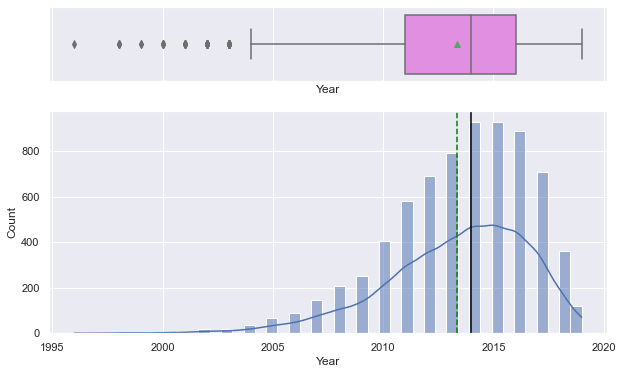

<IPython.core.display.Javascript object>

In [26]:
generate_plot(data, "Year")

- The average of the manufacturing year of the car is 2014.
- There are some outliers that from the older years ( year 1996 to 2004)

### Observation on Kilometers_Driven

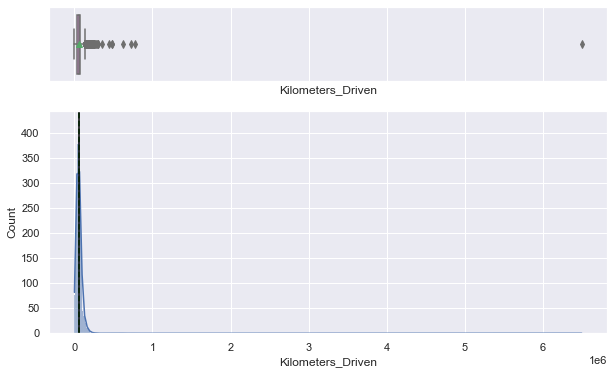

<IPython.core.display.Javascript object>

In [27]:
generate_plot(data, "Kilometers_Driven")

- There are outliers that have a significant gap between 1x1e6 to 6.6x1e6

### Observation on Mileage

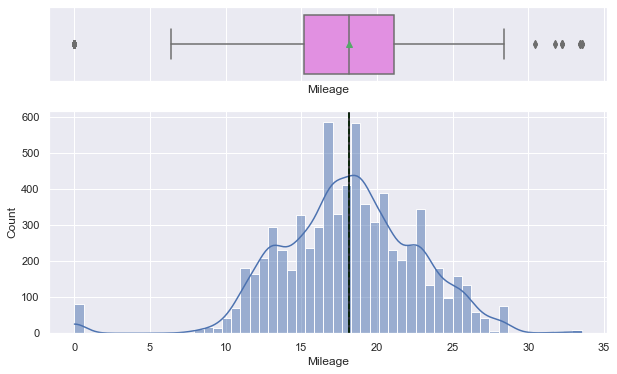

<IPython.core.display.Javascript object>

In [28]:
generate_plot(data, "Mileage")

- The mean of the Mileage is 18.14. This is the unskewed distribution.
- There are a few outliers in the dataset, who have the least mileage, with less than 5 kmpl, and higher mileage with 30-35 kmpl.

### Observation on Engine

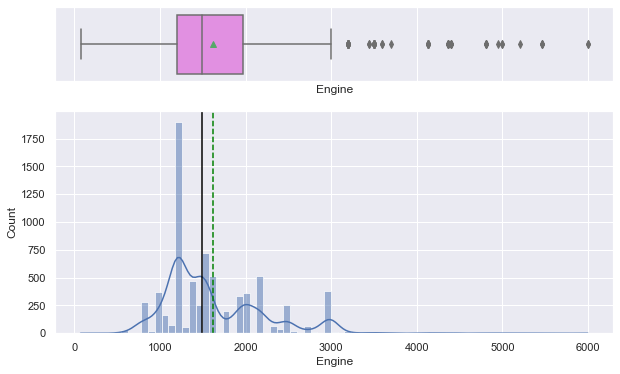

<IPython.core.display.Javascript object>

In [29]:
generate_plot(data, "Engine")

- The mean for the engine is about 1616 CC.
- There are some outliers at higher engine volumne, range about 3200 to 6000 CC.

### Observation on Power

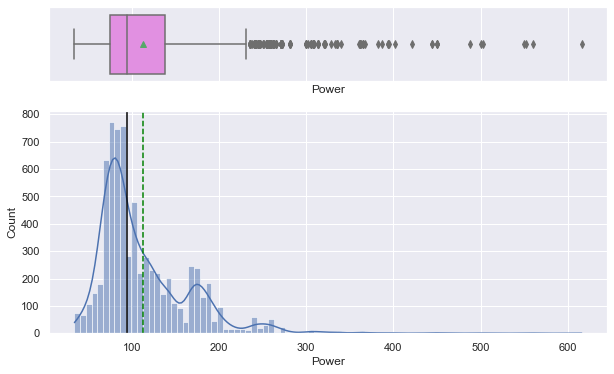

<IPython.core.display.Javascript object>

In [30]:
generate_plot(data, "Power")

- The mean power of the engine is about 112.
- This is right skewed distribution
- There are outliers in the variable, some cars have much more power, ranging from 250 to over 600 bhp.

### Observation on Seats

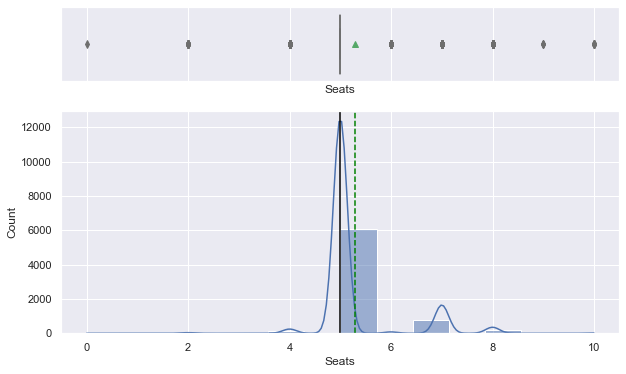

<IPython.core.display.Javascript object>

In [31]:
generate_plot(data, "Seats")

- We can see that there is 0 seat in this dataset, which is impossible. Hence, we can turn 0 value into NaN and fill in values later.
- The mean of the Seats is 5.

### Observation on New_Price

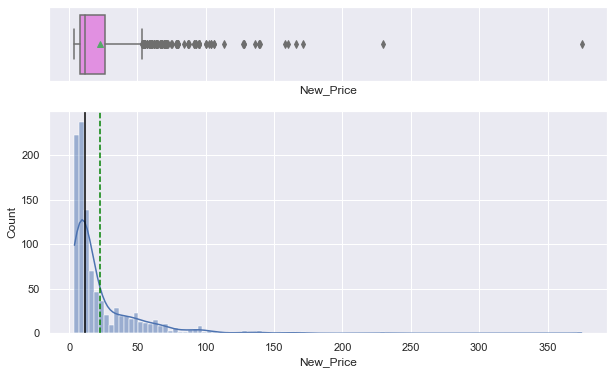

<IPython.core.display.Javascript object>

In [32]:
generate_plot(data, "New_Price")

- The mean of the new car price is about 23 INR Lakhs .
- This is the right skewed distribution.
- There are outliers present, with the highest price is over 350 INR Lakhs.

### Observation on Price

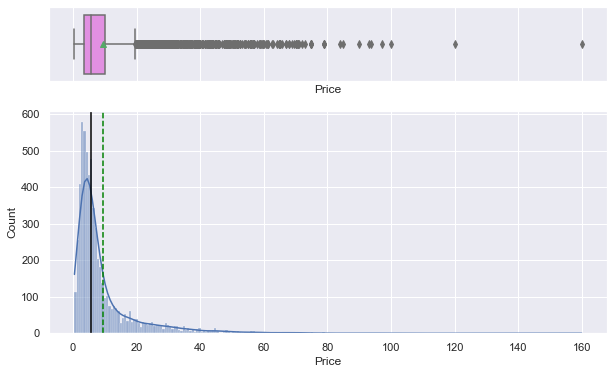

<IPython.core.display.Javascript object>

In [33]:
generate_plot(data, "Price")

- We can see that this is a right skewed distribution.
- There are some outliers that go toward the higher price.

## Observations on non-numerical variables

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   category
 1   Location           7253 non-null   category
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7251 non-null   float64 
 8   Engine             7207 non-null   float64 
 9   Power              7078 non-null   float64 
 10  Seats              7200 non-null   float64 
 11  New_Price          1006 non-null   float64 
 12  Price              6019 non-null   float64 
 13  car_brand          7253 non-null   category
dtypes: category(6), float64(6), int64(2)
memory usage: 601.3 KB


<IPython.core.display.Javascript object>

- We are going to create a function to count the values of each type in each variable and display plots.

In [35]:
def count_statistic(dataframe, feature):
    '''
    Description:
    This is a function to count the values of each type in each variable, and also do the percentage of each type.
    
    Inputs:
    dataframe - the dataset
    feature - the column name
    
    Output:
    Count of each type and percentage
    '''
    
    count_values = dataframe[feature].value_counts()
    print('Counting:')
    print(count_values)
    print('\n')
    print('Population proportion:')
    print(count_values/count_values.sum())


<IPython.core.display.Javascript object>

In [36]:
def generate_countplot(data, feature):
    '''
    Description:
    This is a function to do countplot
    
    Inputs:
    data - the dataset
    feature - the column name
    
    Output:
    The count plot
    '''
    sns.countplot(data = data, x = feature);


<IPython.core.display.Javascript object>

#### Observation on Fuel Type

In [37]:
count_statistic(data, "Fuel_Type")

Counting:
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64


Population proportion:
Diesel      0.531091
Petrol      0.458431
CNG         0.008548
LPG         0.001654
Electric    0.000276
Name: Fuel_Type, dtype: float64


<IPython.core.display.Javascript object>

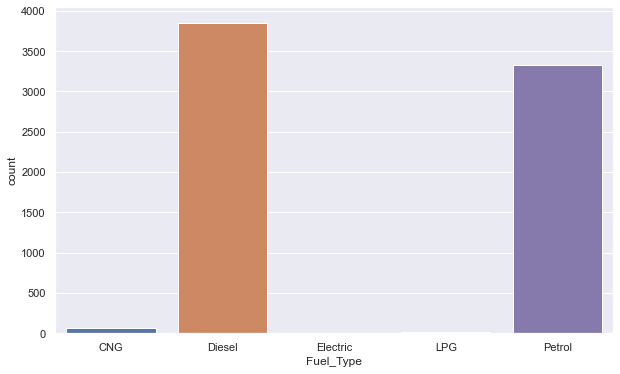

<IPython.core.display.Javascript object>

In [38]:
generate_countplot(data, "Fuel_Type")

- There are 5 types of fuels, and diesel is the most popular, with 53.1% cars in the dataset used diesel.
- The least that used is electric with 0.028%.

#### Observation on Transmission

In [39]:
count_statistic(data, "Transmission")

Counting:
Manual       5204
Automatic    2049
Name: Transmission, dtype: int64


Population proportion:
Manual       0.717496
Automatic    0.282504
Name: Transmission, dtype: float64


<IPython.core.display.Javascript object>

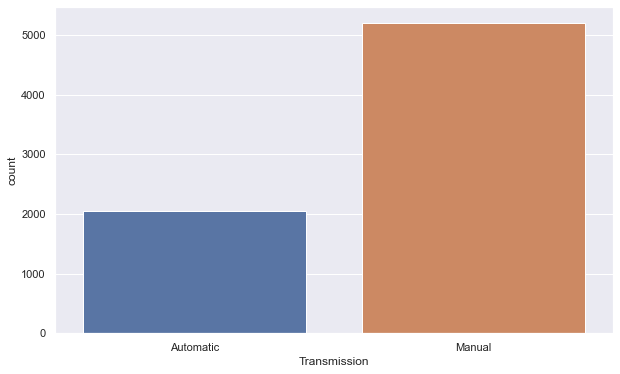

<IPython.core.display.Javascript object>

In [40]:
generate_countplot(data, "Transmission")

- There are two types of Transmission: manual and automatic. Manual mode is more widely used with 71.7% than automatic with 28.3%.

#### Observation on Owner_Type

In [41]:
count_statistic(data, "Owner_Type")

Counting:
First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64


Population proportion:
First             0.820626
Second            0.158831
Third             0.018889
Fourth & Above    0.001654
Name: Owner_Type, dtype: float64


<IPython.core.display.Javascript object>

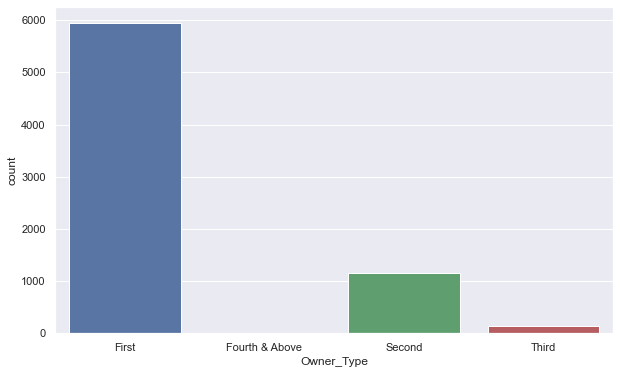

<IPython.core.display.Javascript object>

In [42]:
generate_countplot(data, "Owner_Type")

- 82.1% of the data is first car owner, with 0.17% cars being owned by more than 4 times.

#### Observation on car_brand

In [43]:
count_statistic(data, "car_brand")

Counting:
Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Jeep               19
Porsche            19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Lamborghini         1
Hindustan           1
OpelCorsa           1
Smart               1
Ambassador          1
Name: car_brand, dtype: int64


Population proportion:
Maruti           0.199090
Hyundai          0.184751
Honda            0.102440
Toyota           0.069902
Mercedes-Benz    0.052392
Volkswagen       0.051565
Ford             0.048394
Mahindra         0.045636
BMW              0.0430

<IPython.core.display.Javascript object>

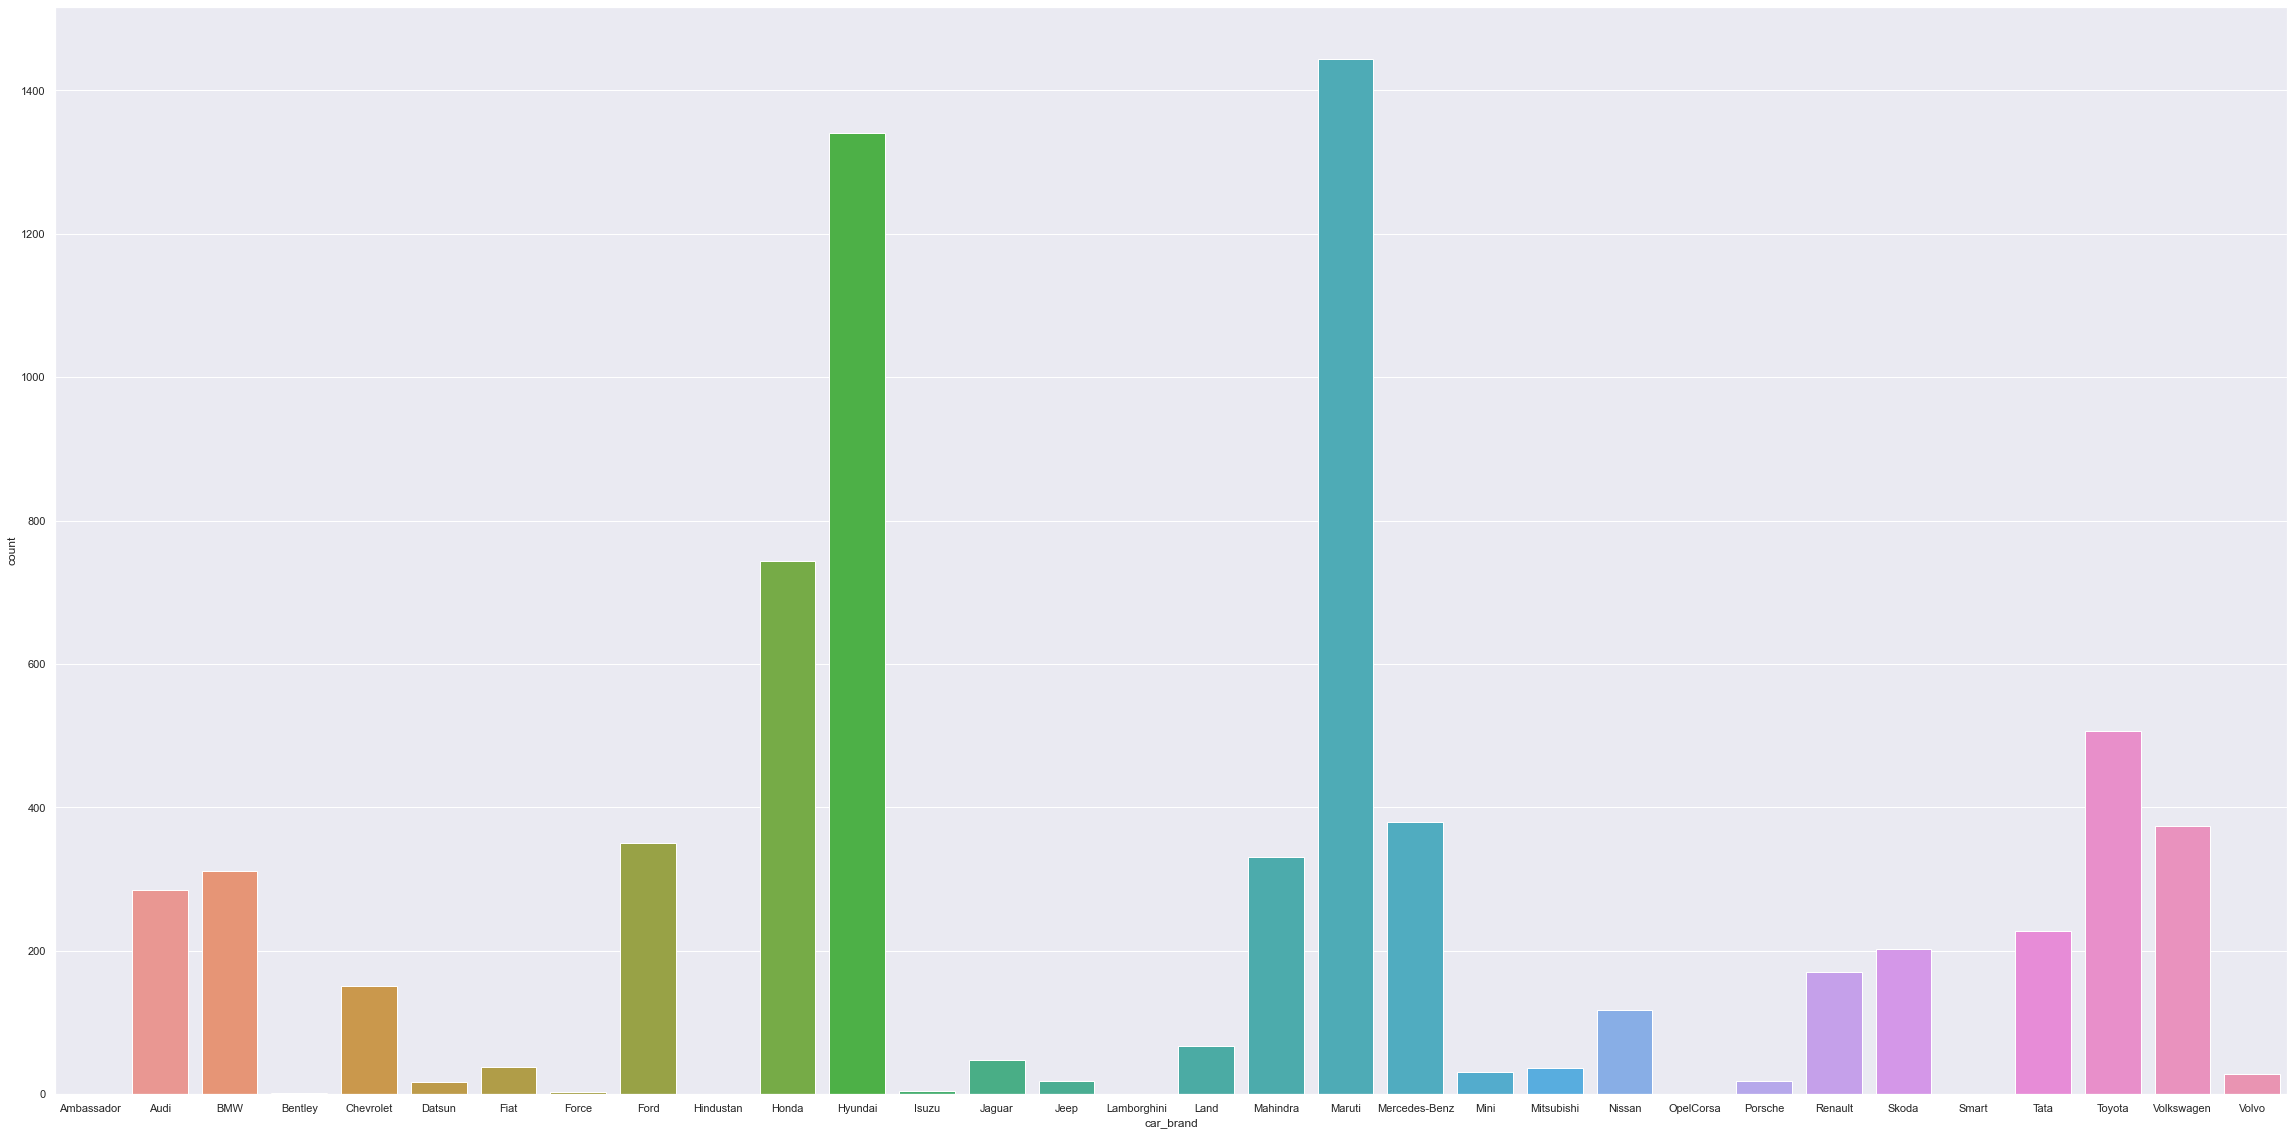

<IPython.core.display.Javascript object>

In [44]:
plt.figure(figsize=(40, 20))
generate_countplot(data, "car_brand")

- Maruti is the most popular car brand with 1444 cars , and Hyundai is the second popular with 1340.

#### Observation on Location

In [45]:
count_statistic(data, "Location")

Counting:
Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64


Population proportion:
Mumbai        0.130842
Hyderabad     0.120778
Kochi         0.106439
Coimbatore    0.106439
Pune          0.105474
Delhi         0.090997
Kolkata       0.090170
Chennai       0.081484
Jaipur        0.068799
Bangalore     0.060665
Ahmedabad     0.037915
Name: Location, dtype: float64


<IPython.core.display.Javascript object>

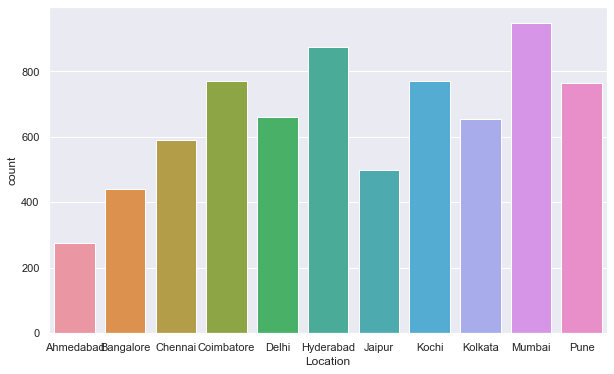

<IPython.core.display.Javascript object>

In [46]:
generate_countplot(data, "Location")

- Mumbai is the most popular place for the cars to be purchased with 949 cars are sold or available, and Hyderabad is the second popular with 876 cars.

# Bivariate Data Analysis

- We are going to create pairplot, correlation and heatmap for the dataset.
- Besides, we are also going to look at visualizations between Price and independent variables.

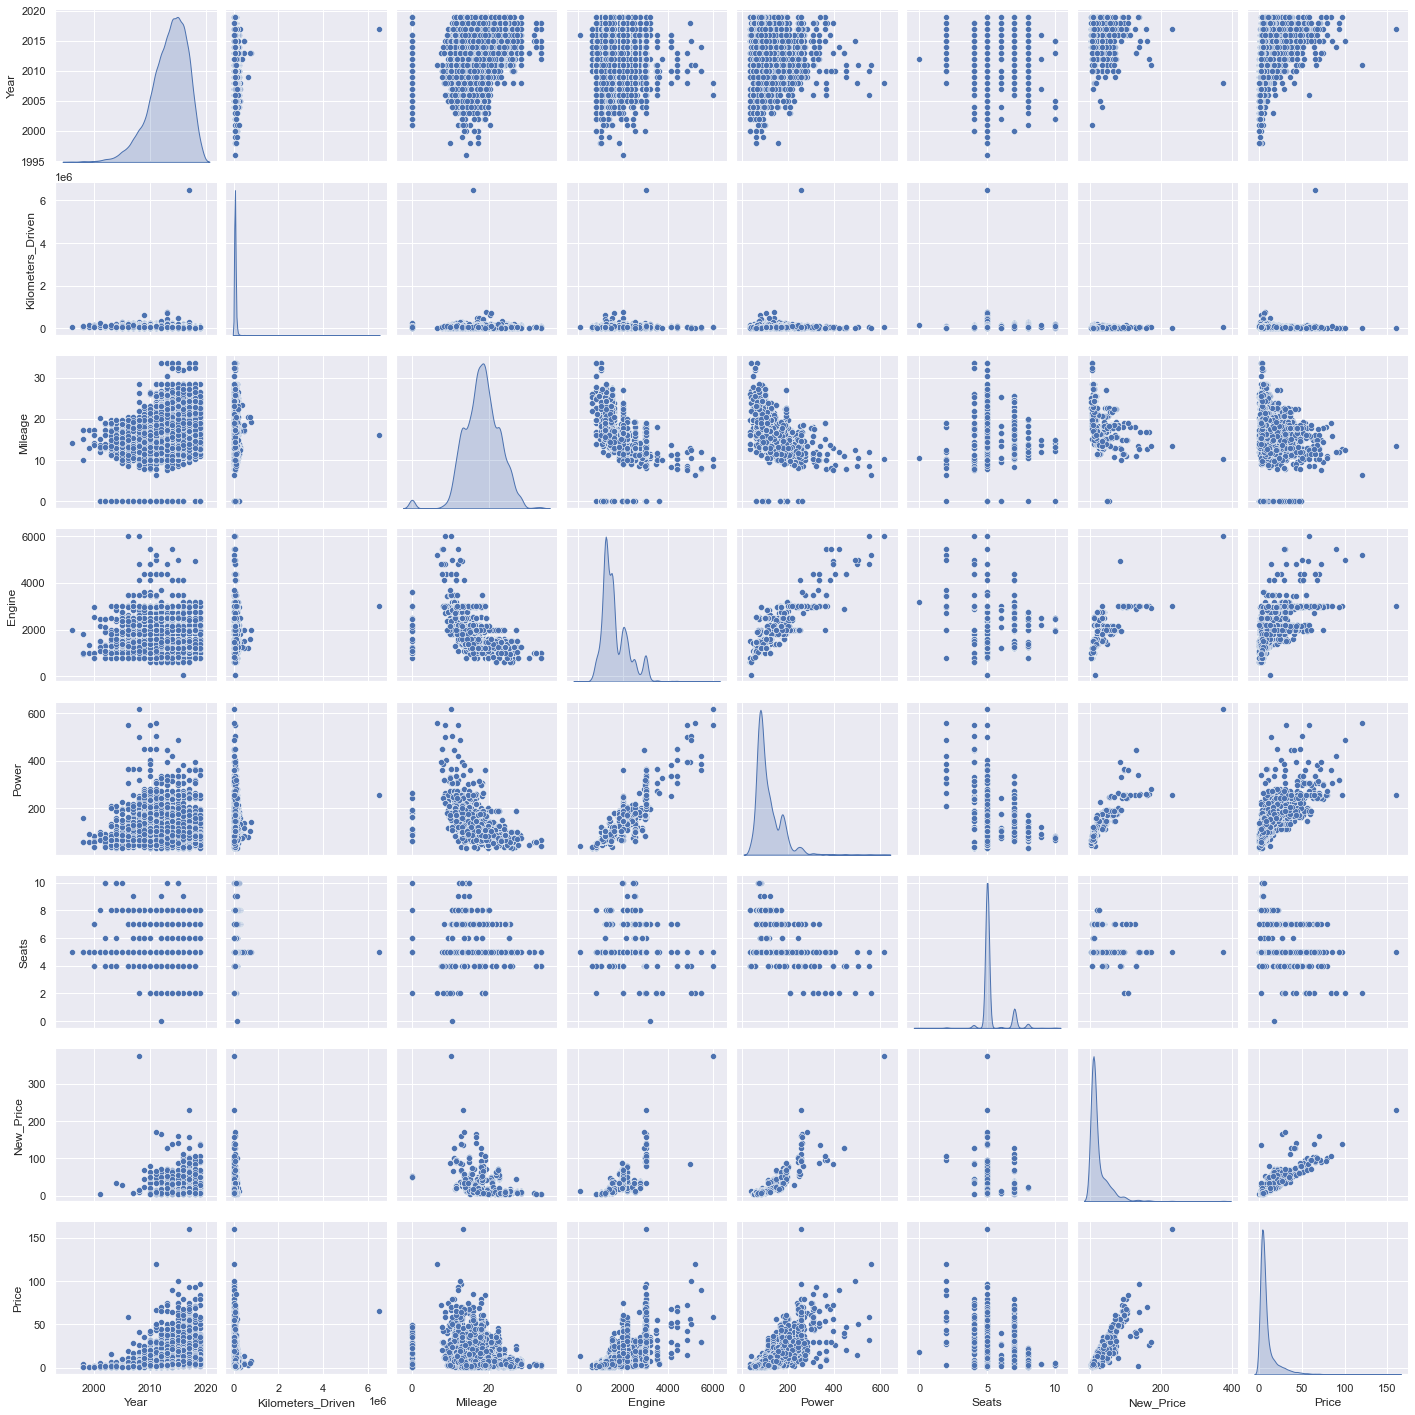

<IPython.core.display.Javascript object>

In [47]:
sns.pairplot(data, diag_kind="kde")

In [48]:
# 2-D matrix:
correlation = data.corr()
correlation

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
Year,1.000000,-0.187859,0.322463,-0.054693,0.013432,0.008216,-0.058798,0.305327
Kilometers_Driven,-0.187859,1.000000,-0.069122,0.094818,0.030164,0.090221,-0.008221,-0.011493
Mileage,0.322463,-0.069122,1.000000,-0.593569,-0.531771,-0.310632,-0.378327,-0.306593
Engine,-0.054693,0.094818,-0.593569,1.000000,0.859771,0.399262,0.735981,0.658354
Power,0.013432,0.030164,-0.531771,0.859771,1.000000,0.095905,0.877708,0.772566
Seats,0.008216,0.090221,-0.310632,0.399262,0.095905,1.000000,-0.019459,0.052225
New_Price,-0.058798,-0.008221,-0.378327,0.735981,0.877708,-0.019459,1.000000,0.871847
Price,0.305327,-0.011493,-0.306593,0.658354,0.772566,0.052225,0.871847,1.000000


<IPython.core.display.Javascript object>

<AxesSubplot:>

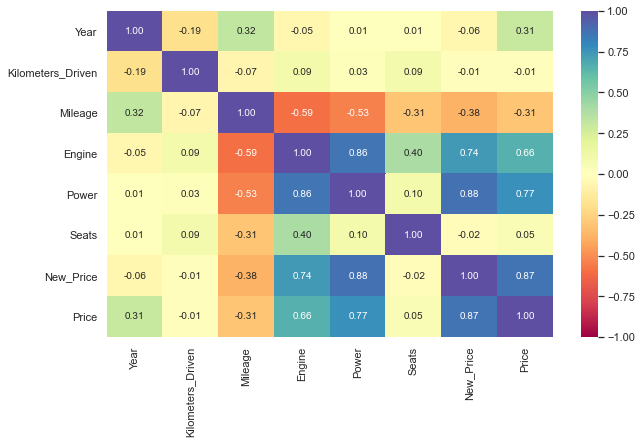

<IPython.core.display.Javascript object>

In [49]:
# heatmap:
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

- There are negative correlation between Mileage, Engine and Power.
- There are high correlation between Engine, Power, New_Price and Price.

### Price with Year

<AxesSubplot:xlabel='Year', ylabel='Price'>

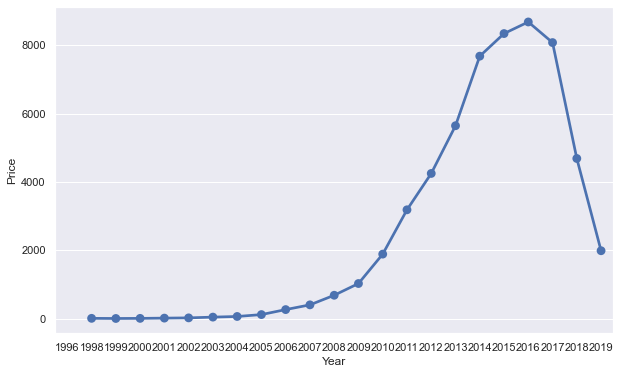

<IPython.core.display.Javascript object>

In [50]:
sns.pointplot(x="Year", y="Price", data=data, estimator=sum, ci=None)

- The newer manufactoring year of the car, the higher the price.
- Year 2016 seems to have the highest price of the used cars.
- This gives us insight that older model tends to be cheaper and more affordable.

### Price with Kilometers_Driven

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Price'>

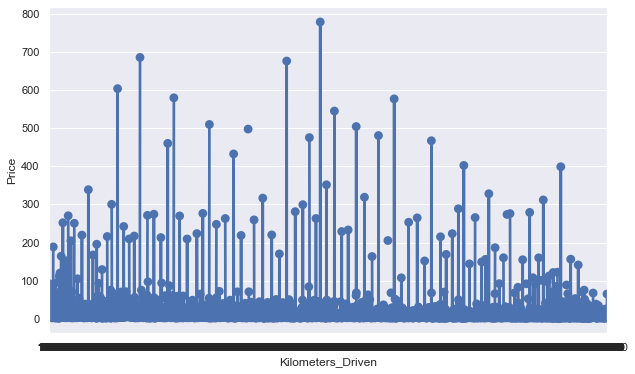

<IPython.core.display.Javascript object>

In [51]:
sns.pointplot(x="Kilometers_Driven", y="Price", data=data, estimator=sum, ci=None)

- The kilometers_Driven variable does not give us much insight about the correlation with the Price.

### Price with Fuel_Type 

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

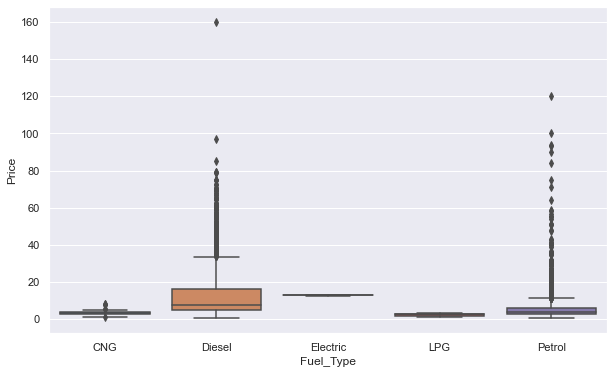

<IPython.core.display.Javascript object>

In [52]:
sns.boxplot(data=data, x="Fuel_Type", y="Price")

- Diesel and Petrol seem to have higher price of used cars than CNG, Electric, and LPG.

### Price with Transmission

<AxesSubplot:xlabel='Transmission', ylabel='Price'>

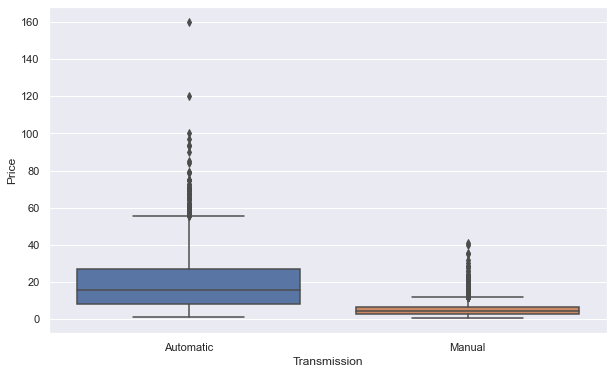

<IPython.core.display.Javascript object>

In [53]:
sns.boxplot(data=data, x="Transmission", y="Price")

- Automatic mode has higher range of price for the used cars compared to manual mode.
- Manual mode is more affordable.

### Price with Owner_Type

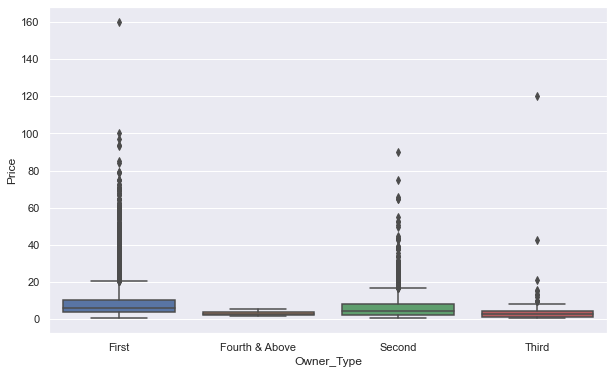

<IPython.core.display.Javascript object>

In [54]:
sns.boxplot(data=data, x="Owner_Type", y="Price")

- First car owner has the highest price for the used cars, whereas fourth and more has the cheapest price for the used cars.

### Price with Mileage

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

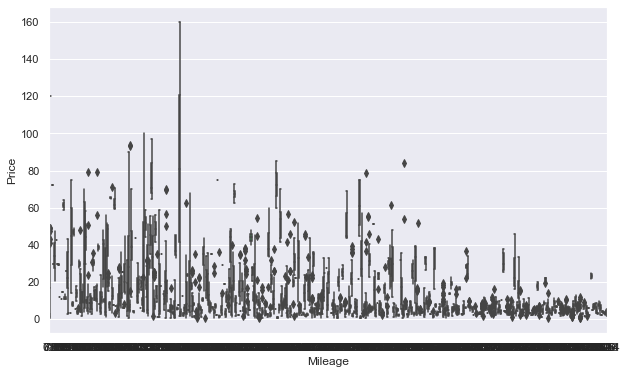

<IPython.core.display.Javascript object>

In [55]:
sns.boxplot(data=data, x="Mileage", y="Price")

- Mileage does not have much correlation with Price. Hence, this does not give us much insight.

### Price with Engine

<AxesSubplot:xlabel='Engine', ylabel='Price'>

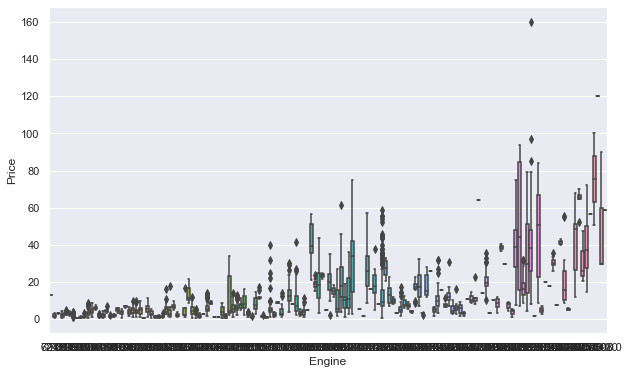

<IPython.core.display.Javascript object>

In [56]:
sns.boxplot(data=data, x="Engine", y="Price")

- The higher the volume of the engine, the higher the price of the used cars.

### Price with Power

<AxesSubplot:xlabel='Power', ylabel='Price'>

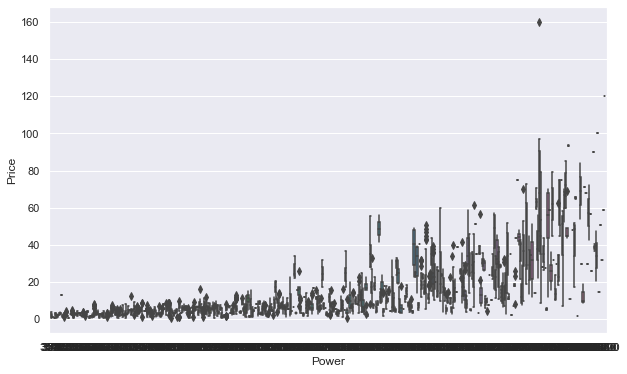

<IPython.core.display.Javascript object>

In [57]:
sns.boxplot(data=data, x="Power", y="Price")

- The stronger the power of the engine, the higher the price of the used cars.

### Price with Seats

<AxesSubplot:xlabel='Seats', ylabel='Price'>

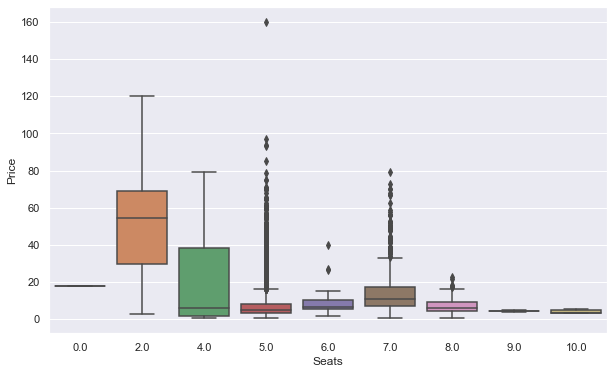

<IPython.core.display.Javascript object>

In [58]:
sns.boxplot(data=data, x="Seats", y="Price")

- 2 seats and 5 seats in the cars tend to have higher price for the used cars.
- As the car seats increase above 7, the price of the used cars drop.

### Price with car_brand

<AxesSubplot:xlabel='Price', ylabel='car_brand'>

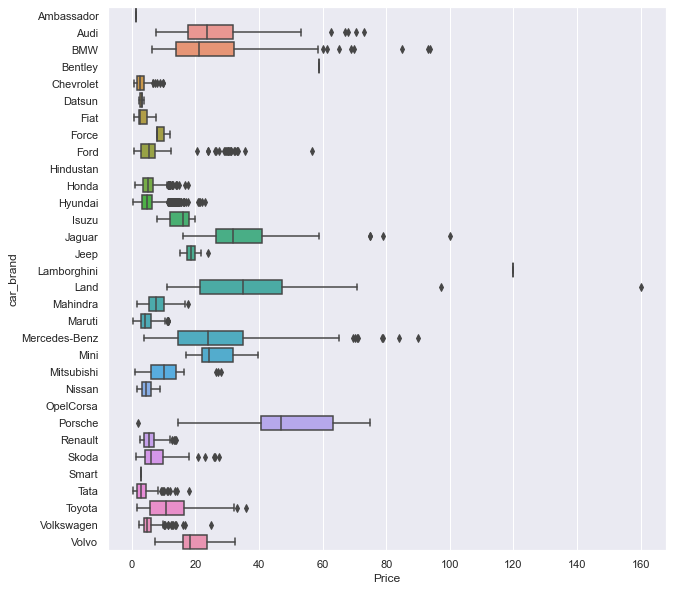

<IPython.core.display.Javascript object>

In [59]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=data, x="Price", y="car_brand")

- Land Rover cars have highest price for the used cars, with the least is Ambassador.

### Price with Location

<AxesSubplot:xlabel='Location', ylabel='Price'>

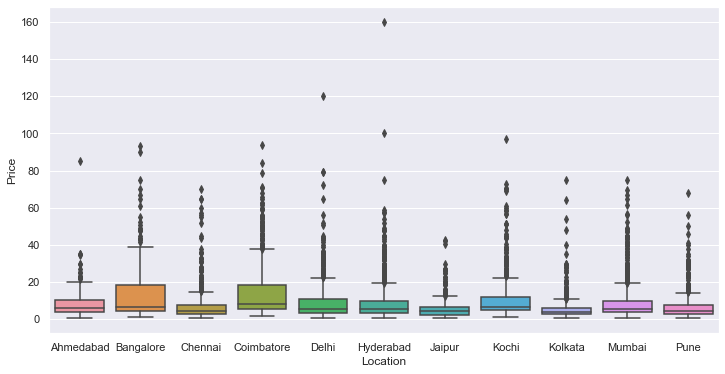

<IPython.core.display.Javascript object>

In [60]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, y="Price", x="Location")

- Hyderabad city has the highest price of the used cars.

## Summary of EDA

**Data Description:**
- The dataset has 7253 rows and 14 columns.
- The target variable Price is a float type.
- Units in Mileage, Engine, and Power varirables are removed, and only keep the numeric data.
- For New_Price variable, the units are converted to Lakh for later analysis.
- For S.No. variable, the column is dropped as it does not provided significant information to the dataset.
- car_brand variable is created from Name variable, to contain the brand names of the cars.
- There are some variables that converted to category type:Owner_Type, Tranmission, Fuel_Type, Name, Location, and car_brand.
- There are many variables that have missing values.

**Univariate Data Analysis:**
- `Year`: The average of the manufacturing year of the car is 2014, and there are some outliers around year 1996 to 2004.
- `Kilometers_Driven`: There are outliers that have a significant gap between 1x1e6 to 6.6x1e6.
- `Mileage`: The mean of the Mileage is 18.14. This is the unskewed distribution.
- `Engine`: The mean for the engine is about 1616 CC.There are some outliers at higher engine volumne, range about 3200 to 6000 CC.
- `Power`: The mean power of the engine is about 112. This is right skewed distribution. There are some outliers in this variable.
- `Seats`: The mean of the Seats is 5. We can see that there is 0 seat in this dataset, which is impossible. Hence, we can turn 0 value into NaN and fill in values later.
- `New_Price`: The mean of the new car price is about 23 INR Lakhs. This is the right skewed distribution. There are outliers present in the variable.
- `Price`: This is a right skewed distribution. There are some outliers that go toward the higher price.
- `Fuel_Type`: There are 5 types of fuels, and diesel is the most popular, with 53.1% cars in the dataset used diesel.
- `Transmission`: There are two types of Transmission: manual and automatic. Manual mode is more widely used with 71.7% than automatic with 28.3%.
- `Owner_Type`: 82.1% of the data is first car owner, with 0.17% cars being owned by more than 4 times.
- `car_brand`: Maruti is the most popular car brand with 1444 cars , and Hyundai is the second popular with 1340.
- `Location`:Mumbai is the most popular place for the cars to be purchased with 949 cars are sold or available.

**Bivariate Data Analysis** 
- Price for used cars tend to be more affordable with seats of 6, 8, 9, or 10. Seat of 2 and 5 have higher price ranges.
- The stronger the power of the engine, the higher the price of the used cars.
- The higher the volume of the engine, the higher the price of the used cars.
- The more ownership of the cars, the cheaper the price. First car owner has the most expensive price, along with second owner.
- Automatic mode has higher range of price for the used cars compared to manual mode. Hence, manual mode is more affordable for the used cars.
- Diesel and Petrol seem to have higher price of used cars than CNG, Electric, and LPG.
- The older manufactoring year of the car, the lower the price.
- Land Rover cars have highest price for the used cars, with the least is Ambassador.
- Hyderabad city has the highest price of the used cars.




# Data Pre-Processing

- We are going to do some treatment for missing values, outliers, and feature engineering.

## Missing Value Treatment 

In [61]:
data.isnull().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
car_brand               0
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

<IPython.core.display.Javascript object>

- There are 6 columns that have missing values, and New_Price column has the most missing values

### New_Price Column

Column New_Price seems to have most of the missing values, 6247 out of 7253, about 86% of values in this column are missing. Besides, we are targeting the price of the used cars, not price from the new cars.
Hence, we can drop this column as this variable will not give us much insight.

In [62]:
# Drop column New_Price:
data.drop(["New_Price"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

### Price Column

Since Price column is the target variable that we're going to do the model with, it is preferred to drop the missing values.

In [63]:
# Drop the missing values in Price column:
data.dropna(subset=["Price"], inplace=True)

<IPython.core.display.Javascript object>

### Power and Engine Column

- First of all, we need to check if Power and Engine variables are skewed distribtion. If the mean is greater than the median, median imputation will be used to treat missing values.

In [64]:
def get_stats(data, column):
    """
    Description:
    This is a function to get mean and median values for a feature.

    Inputs:
    data - the dataset
    column - the column name

    Output:
    The mean and median values
    """
    print(f"The mean of {column} column is {round(data[column].mean(), 3)}")
    print(f"The median of {column} column is {round(data[column].median(), 3)}")
    print("\n")

<IPython.core.display.Javascript object>

In [65]:
target_columns = ["Power", "Engine"]
for column in target_columns:
    get_stats(data, column)

The mean of Power column is 113.253
The median of Power column is 97.7


The mean of Engine column is 1621.276
The median of Engine column is 1493.0




<IPython.core.display.Javascript object>

For Power and Engine, the means are greater than the median, we can fill the missing values with the median of these variables.

In [66]:
# Power column:
data["Power"].fillna(data["Power"].median(), inplace=True)

<IPython.core.display.Javascript object>

In [67]:
# Enginer column:
data["Engine"].fillna(data["Engine"].median(), inplace=True)

<IPython.core.display.Javascript object>

### Seats Column

From the beginning, we know that there is 0 seats in the dataset, which is impossible. Hence, we are going to change 0 value to Nan in order to evaluate easier later on.

In [68]:
# Check 0 value:
data["Seats"].value_counts()

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

<IPython.core.display.Javascript object>

In [69]:
# Replace rows that have 0 values in Seats column with NaN:
data["Seats"].replace(0, np.nan, inplace=True)

<IPython.core.display.Javascript object>

In [70]:
# Check to see if 0 value disappears:
data["Seats"].value_counts()

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
Name: Seats, dtype: int64

<IPython.core.display.Javascript object>

In [71]:
# get the mean and median of the Seats variable:
get_stats(data, "Seats")

The mean of Seats column is 5.28
The median of Seats column is 5.0




<IPython.core.display.Javascript object>

The mean of Seats column is 5.28 and median is 5. Since the values are relatively similar, we can apply mean imputation for Seats variable

In [72]:
# Use mean imputation:
data["Seats"].fillna(data["Seats"].mean(), inplace=True)

<IPython.core.display.Javascript object>

### Mileage Column

In [73]:
# Get the mean and median of the Mileage column:
get_stats(data, "Mileage")

The mean of Mileage column is 18.135
The median of Mileage column is 18.15




<IPython.core.display.Javascript object>

Since the mean and median of Mileage column are similar, we can use mean imputation to fill in the missing values.

In [74]:
# Using mean imputation to fill in missing values:
data["Mileage"].fillna(data["Mileage"].mean(), inplace=True)

<IPython.core.display.Javascript object>

In [75]:
# Check for missing values again in dataset:
data.isnull().sum().sort_values(ascending=False)

car_brand            0
Price                0
Seats                0
Power                0
Engine               0
Mileage              0
Owner_Type           0
Transmission         0
Fuel_Type            0
Kilometers_Driven    0
Year                 0
Location             0
Name                 0
dtype: int64

<IPython.core.display.Javascript object>

The dataset now doesn't have any missing values. Hence, this data is good to move forward with incoming analyses.

## Outlier Treatment

Based on the above visualtions for each feature, the variables that have outstanding outliers are:
- Kilometers_Driven
- Mileage 
- Engine
- Power
- Price

We are going to investigate further for these variables and apply appropriate outlier treatment. We will need to make a copy of the data in case we would like to do analysis with outliers later.

In [76]:
data_with_outliers = data.copy()

<IPython.core.display.Javascript object>

As we can see, there are significant outliers. First, we will need to detect how many outliers are there using Z-score. For z-score, any points that fall outside 3 standard deviations is an outlier.

In [77]:
outlier = []


def find_z_score(data, feature, threshold=3):
    """
    Description:
    This is a function to detect number of outliers.

    Inputs:
    data - the dataset
    feature - column name
    threshold - value is 3 because any points that fall outside 3 standard deviation is an outlier

    Output:
    Number of outliers in a variables
    """

    mean = np.mean(data[feature])
    std = np.std(data[feature])

    for value in data[feature]:
        z_score = (value - mean) / std
        # use absolute on z score to have more accurate result
        if np.abs(z_score) > threshold:
            outlier.append(value)
    return outlier

<IPython.core.display.Javascript object>

In [78]:
target_columns = ["Kilometers_Driven", "Mileage", "Engine", "Power", "Price"]

<IPython.core.display.Javascript object>

In [79]:
#Detect number of outliers for target variables:
for column in target_columns:
    outliers = find_z_score(data, column)
    print('There are ', len(outliers), ' outliers in ', column, ' variable')
    print('-'*20)


There are  7  outliers in  Kilometers_Driven  variable
--------------------
There are  86  outliers in  Mileage  variable
--------------------
There are  130  outliers in  Engine  variable
--------------------
There are  194  outliers in  Power  variable
--------------------
There are  343  outliers in  Price  variable
--------------------


<IPython.core.display.Javascript object>

- There are some outliers in each variable, with Kilometers_Driven variable has the least.
- We can use Interquartile range (IQR) method to do outlier treatment.

In [80]:
def IQR_method(data, feature):
    '''
    Description:
    - This is a function that uses Interquartile range (IQR) method to do outlier treatment. 
    - Q1 is known as 25th percentile. Q3 is known as 75th percentile. IQR= Q3-Q1
    - Any data points that fall outside the minimum (Q1-1.5*IQR) and maximum (Q3+1.5*IQR) are outliers.
    - Hence, the data points that are less than the minimum, will be replaced with the minimum values.
    - Data points that are greater than the maximum values, will be replaced with the maximum values.
    
    Inputs:
    data - the dataset
    feature - column name
    
    Output:
    Updated values for outliers
    '''
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3-Q1
    lower_range = Q1 - 1.5*IQR
    upper_range = Q3 + 1.5*IQR
    
    #replace outliers with lower range values and upper range values:
    data[feature] = np.where(data[feature] < lower_range, lower_range, data[feature])
    data[feature] = np.where(data[feature] > upper_range, upper_range, data[feature])


<IPython.core.display.Javascript object>

In [81]:
# Outlier treatment for target variables:
for column in target_columns:
    IQR_method(data, column)

<IPython.core.display.Javascript object>

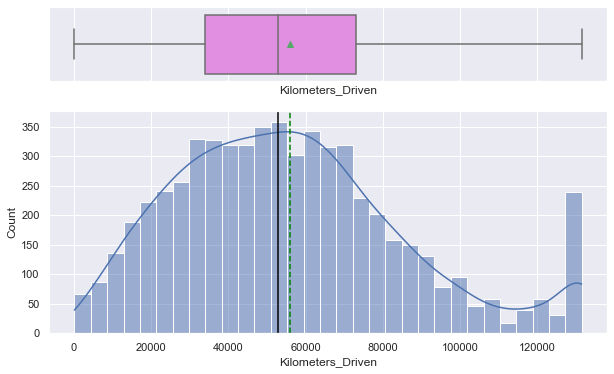

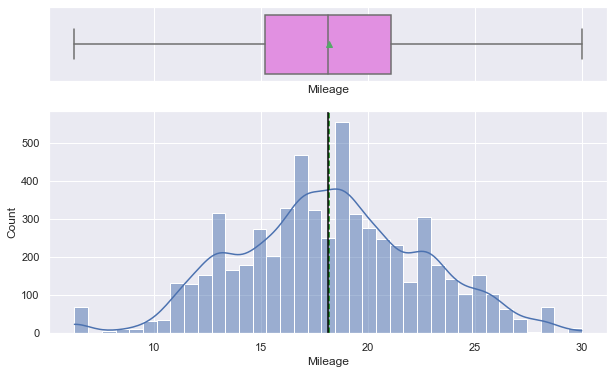

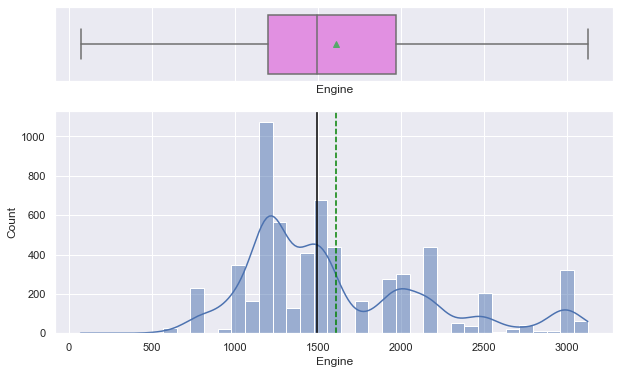

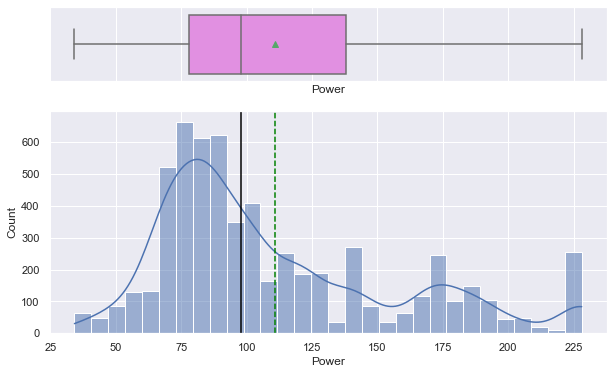

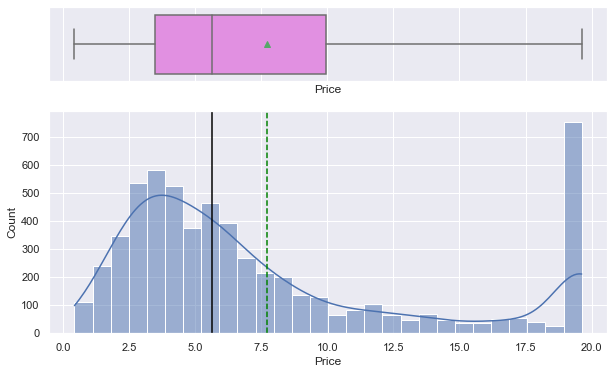

<IPython.core.display.Javascript object>

In [82]:
# Do the plots for target variables to see if the method improves the outliers:
for column in target_columns:
    generate_plot(data, column)
    plt.show()

 - We can see the outliers are treated, and the data is good to proceed with the next step.

## Feature Engineering

- Since modeling only takes numeric data, and we are going to engineer some features. 
- Besides, before creating a model, we are going to apply one-hot encoding by creating dummy variables. Hence, we do not want to have a lot of columns in the dataset. The reason is that the more columns, the more complicated the dataset is.

### Price Column

- We are going to create a category based on the Price: low end and high end used cars in order to be analyzed easier later on.
- First, we are going to examine the summary statistics for Price variable.

In [83]:
data["Price"].describe()

count    6019.000000
mean        7.708463
std         5.769853
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max        19.625000
Name: Price, dtype: float64

<IPython.core.display.Javascript object>

As we can see, maximum of the price is 19.625 INR Lakhs. Hence, we can create a threshold of 19 to identify the price categories:
- If the price > 19, it is high-end used cars
- If the price < 19, it is low-end used cars

In [84]:
data[data["Price"] > 19]["car_brand"].value_counts()

Mercedes-Benz    191
Audi             156
BMW              148
Toyota            62
Land              48
Jaguar            38
Mini              25
Ford              23
Porsche           16
Volvo             10
Jeep               6
Skoda              5
Hyundai            5
Mitsubishi         3
Bentley            1
Isuzu              1
Lamborghini        1
Volkswagen         1
Mahindra           0
Maruti             0
Nissan             0
Honda              0
Hindustan          0
OpelCorsa          0
Force              0
Fiat               0
Datsun             0
Chevrolet          0
Renault            0
Smart              0
Tata               0
Ambassador         0
Name: car_brand, dtype: int64

<IPython.core.display.Javascript object>

- With the threshold = 19, the high-end car brands look to be as expected based on the domain knowledge.

In [85]:
# create a function to apply the threshold and create a new column:
def define_car_type(value):
    if value < 19:
        return "low_end"
    elif value > 19:
        return "high_end"

<IPython.core.display.Javascript object>

In [86]:
# apply the function and create a new column:
data["car_type"] = data["Price"].apply(define_car_type)

<IPython.core.display.Javascript object>

In [87]:
data["car_type"].value_counts()

low_end     5265
high_end     740
Name: car_type, dtype: int64

<IPython.core.display.Javascript object>

- Now there are two categories of car types: high-end used cars with 740 counts, and low-end used cars with 5265 counts.
- We need to convert car_type column from object to category.

In [88]:
data["car_type"] = data["car_type"].astype("category")

<IPython.core.display.Javascript object>

- car_type variable is now category type.
- We will now drop the unnecessary variables in the dataset to prepare bulding analysis model.

In [89]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,car_brand,car_type
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,low_end
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,low_end
2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,low_end
3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,low_end
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,low_end


<IPython.core.display.Javascript object>

- The columns we going to drop are: 
    - Name and car_brand columns - we engineered the feature into car_type variable. Hence, it is not necessary to keep these variables.


In [90]:
data.drop(["Name", "car_brand"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [91]:
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,car_type
0,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,low_end
1,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,low_end
2,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,low_end
3,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,low_end
4,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,low_end


<IPython.core.display.Javascript object>

- The data is now good to proceed to build analysis model.

## Summary of Data Pre-Processing

**Missing Value Treatment**
- `New_Price`: Column New_Price 6247 missing values out of 7253, about 86% of values in this column are missing. Hence, this column is dropped as it doesn't not provide much insight.
- `Price`: The missing values are dropped as Price column is the target variable.
- `Power` and `Engine`: The missing values are replaced wtih median imputation because the means are greater than the median.
- `Seats`: Zero values are replaced with NaN. Mean imputation is applied to fill in the missing values.
- `Mileage`: Since the mean and median of Mileage column are similar, mean imputation is applied to fill in the missing values.

**Outlier Treatment**
- After determining the number of outliers in Kilometers_Driven, Mileage, Engine , Power, and Price,  Interquartile range (IQR) method is used to do outlier treatment. The outliers are treated.

**Feature Engineering**
- car_type variable is created based on Price column, to categorize the price type of the used cars into low-end and high-end type. 
- car_type has 5265 cars that are low-end, and 740 cars that are high-end.
- Column Name and car_brand are dropped as they are not necessary in the dataset.


## Model building - Linear Regression

### Define dependent variable

In [92]:
# Price is target variable, also a dependent variable
X = data.drop(["Price"], axis=1)
y = data["Price"]

<IPython.core.display.Javascript object>

### Create dummy variables

In [93]:
X.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,car_type
0,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,low_end
1,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,low_end
2,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,low_end
3,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,low_end
4,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,low_end


<IPython.core.display.Javascript object>

- We are going to turn Location, Fuel_Type, Transmission, Owner_Type, and car_type into one-hot encoding dummary variables.

In [94]:
X = pd.get_dummies(
    X,
    columns=["Location", "Fuel_Type", "Transmission", "Owner_Type", "car_type"],
    drop_first=True,
)

<IPython.core.display.Javascript object>

In [95]:
X.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,car_type_low_end
0,2010,72000.0,26.60,998.0,58.16,5.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
1,2015,41000.0,19.67,1582.0,126.20,5.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1
2,2011,46000.0,18.20,1199.0,88.70,5.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
3,2012,87000.0,20.77,1248.0,88.76,7.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,2013,40670.0,15.20,1968.0,140.80,5.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1


<IPython.core.display.Javascript object>

### Split the data into train and test

In [96]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

<IPython.core.display.Javascript object>

- We split the data into 70:30 ratio, with the random_state = 2. 
- The reason including the random_state is to make sure everytime we run the code, the split remains the same as the previous split, so the results can be reproducible. 

In [97]:
print("The number of rows in train data:", x_train.shape[0])
print("The number of rows in test data:", x_test.shape[0])

The number of rows in train data: 4213
The number of rows in test data: 1806


<IPython.core.display.Javascript object>

### Fit Linear Model

In [98]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

- The linear regression model is built, now we need to check the coefficients and intercept of the model.

#### Coefficient

In [99]:
pd.DataFrame(regression_model.coef_, x_train.columns, columns=["Coefficients"])

,Coefficients
Year,0.457403
Kilometers_Driven,-0.000012
Mileage,-0.100617
Engine,0.000864
Power,0.044651
Seats,0.056216
Location_Bangalore,0.113332
Location_Chennai,-0.312845
Location_Coimbatore,0.039354
Location_Delhi,-0.675312


<IPython.core.display.Javascript object>

#### Intercept

In [100]:
intercept = regression_model.intercept_
print("The intercept for the linear model is ", round(intercept, 3))

The intercept for the linear model is  -911.565


<IPython.core.display.Javascript object>

#### Coefficient Interpretations


- Coefficient of Year, Enginer, Power, Seats, some of the Location columns, some of the Fuel_type columns are positive. 
    - This indicates as these columns increase, the dependent variable Price also increases.
    
- Coefficient of Kilometers_Driven, Mileage, some of the Location columns, some of the Fuel_type columns, Transmission, Owner_Type, and car_type columns are negative.
    - This indicates as these columns increases, the dependent variable Price decreases.

### Model performance check

- We need to find the following in order to check the model performance:
    - R-squared
    - Adjusted R-squared
    - Mean Absolute Error (MAE)
    - Root Mean Square Error (RMSE)
    - Mean Absolute Percentage Error (MAPE)
    
- We will use sklearn package to calculate R-squared, MAE, RMSE. Other metrics will be calculated manually.

In [101]:
# Create a function to calculate Adjusted R-squared
def find_adj_r2(r2, predictor):
    """
    Description:
    This is the function to calcualte Adjusted R-squared

    Inputs:
    predictor = independent variables
    r2 = calculated R-squared value

    Output:
    Adjusted R squared

    --------------------------
    Adjusted R-squared formula:
    Adj.R2 = 1- ((1-r2)(N-1))/(N-k-1)
    where:
    N = number of rows in the predictor data
    k = number of the independent variables (number of columns in predictor data)
    """

    N = predictor.shape[0]
    k = predictor.shape[1]
    adj_r2 = 1 - ((1 - r2) * (N - 1)) / (N - k - 1)
    return adj_r2

<IPython.core.display.Javascript object>

In [102]:
# Compute Mean Absolute Percentage Error (MAPE)
def find_mape(target, prediction):
    """
    Description:
    This function is to calculate MAPE

    Inputs:
    target = target, dependepent variable (y_train)
    prediction = predicted values using independent variables

    Ouput:
    MAPE score
    """
    mape = np.mean(np.abs((target - prediction) / target)) * 100
    return mape

<IPython.core.display.Javascript object>

In [103]:
# Create a master function to return the results:
def find_reg_values(regres_model, predictor, target):
    """
    Description:
    This function is to return the regression results, including:
    R-squared, Adj.R-squared, MAE, RMSE, and MAPE

    Inputs:
    predictor = independent variables
    target = dependent variables

    Output:
    A dataframe of the regression results
    """

    # Calculate the prediction of the dependent variable based on independent variables:
    prediction = regres_model.predict(predictor)

    # Calculate R-squared:
    r2 = r2_score(target, prediction)

    # Calculate Adjusted R-squared:
    adj_r2 = find_adj_r2(r2, predictor)

    # Compute Mean Absolute Error (MAE):
    mae = mean_absolute_error(target, prediction)

    # Compute Root Mean Square Error (RMSE):
    # if squared = True, the output will be Mean Squared Error (MSE)
    rmse = mean_squared_error(target, prediction, squared=False)

    # Calculate MAPE score:
    mape = find_mape(target, prediction)

    # Create a dataframe to gather the results:
    pred_df = pd.DataFrame(
        {
            "R-squared": r2,
            "Adjusted R-quared": adj_r2,
            "MAE": mae,
            "RMSE": rmse,
            "MAPE": mape,
        },
        index=[0],
    )

    return pred_df

<IPython.core.display.Javascript object>

- We are going to do performance check on the train and test dataset.

In [104]:
# Find regression values for train dataset:
train_model = find_reg_values(regression_model, x_train, y_train)
train_model

,R-squared,Adjusted R-quared,MAE,RMSE,MAPE
0,0.885303,0.884618,1.426309,1.963419,29.191673


<IPython.core.display.Javascript object>

In [105]:
# Find regression values for test dataset:
test_model = find_reg_values(regression_model, x_test, y_test)
test_model

,R-squared,Adjusted R-quared,MAE,RMSE,MAPE
0,0.875544,0.873796,1.441137,2.011727,28.870011


<IPython.core.display.Javascript object>

#### Observations

- For the R-squared and Adjusted R-squared, they are measures of the percentage of total variance in the dataset, range from 0 to 1. The higher the values are, the better fit the model is.
    - The R-squared of train dataset is approximately 0.885 and test dataset is 0.876. This means about 88.6% and 87.6% of total variance in the train and test dataset.
    - Both R-squared and Adjusted R-squared are high, meaning that the model performed well.

- For MAE, RMSE, and MAPE, they are metrics to check the prediction accuracy. Hence the lower the values are, the better the model is.
    - MAE values for both train and test dataset are 1.426 and 1.441 respectively. This indicates that the model predicts the price of the used cars within mean error of 1.441 for test dataset.
    - RMSE values for both train and test dataset are 1.963 and 2.011 respectively.These values are similar and indicates not overfit.
    - MAPE values for both train and test dataset are also similar, about 29.19% and 28.87% on the train and test dataset respectively.

- Even though the model is a good fit, we can try other method, such as forward feature selection, to see if the model improves.
- Forward feature selection method is an iterative tool to select the features that give best improvements for the model.

### Model 2: Forward Feature Selection Method

- We are going to create a function for forward feature selection method, and build a second linear regression model to compare with the first model.

In [106]:
# Create second linear model:
model_2_reg = LinearRegression()

<IPython.core.display.Javascript object>

In [107]:
# create forward feature selection function
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

def forward_selection(model_reg,k_feature):
    """
    Description:
    This is the function to do forward feature selection
    
    Inputs:
    model_reg - linear regression model
    k_feature - number of features to select
    
    Output:
    Forward feature selection model
    """
    
    sfs = SFS(
    model_reg,
    k_features=k_feature,
    forward=True, 
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
    )
    
    # Build the forward feature selection model:
    sfs = sfs.fit(x_train, y_train)
    return sfs



<IPython.core.display.Javascript object>

In [108]:
# Apply the function:
sfs_model = forward_selection(model_2_reg, x_train.shape[1])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.1s finished

[2021-11-19 20:05:35] Features: 1/25 -- score: 0.6644365842083992[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.0s finished

[2021-11-19 20:05:35] Features: 2/25 -- score: 0.7859104197171825[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.0s finished

[2021-11-19 20:05:35] Features: 3/25 -- score: 0.8496424817142234[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  22 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.0s finished

[2021-11-19 20:05:35] Features: 4/25 -- score: 0.8611700368763406[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent 

<IPython.core.display.Javascript object>

(<Figure size 720x432 with 1 Axes>,
 <AxesSubplot:xlabel='Number of Features', ylabel='Performance'>)

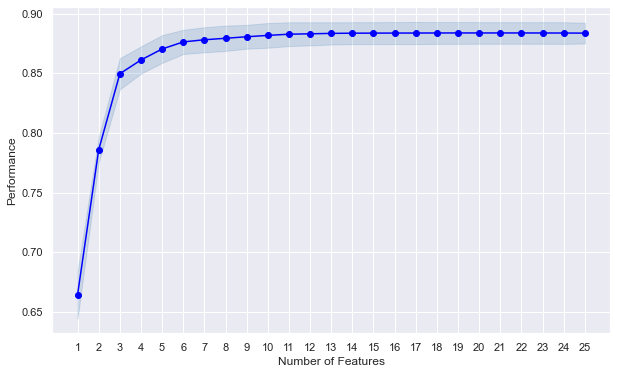

<IPython.core.display.Javascript object>

In [109]:
# Plot the model
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

plot_sfs(sfs_model.get_metric_dict(), kind="std_dev")

- From the plot observation, the performce becomes constant after feature 10th. Hence, we can minimize the features from 25 to 10 to see if the model is improved.

In [110]:
# Apply the function with k_feature = 10:
sfs_model2 = forward_selection(model_2_reg, 10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.0s finished

[2021-11-19 20:05:37] Features: 1/10 -- score: 0.6644365842083992[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.0s finished

[2021-11-19 20:05:37] Features: 2/10 -- score: 0.7859104197171825[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.0s finished

[2021-11-19 20:05:37] Features: 3/10 -- score: 0.8496424817142234[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.0s finished

[2021-11-19 20:05:38] Features: 4/10 -- score: 0.8611700368763406[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent 

<IPython.core.display.Javascript object>

- We are going to filter the columns of the x_train and x_test with columns we selected for k_feature = 10.

In [111]:
# Get the column names that we selected for k_feature = 10, and filter with x_train
target_columns = list(sfs_model2.k_feature_idx_)
x_train_2 = x_train[x_train.columns[target_columns]]
x_test_2 = x_test[x_test.columns[target_columns]]

<IPython.core.display.Javascript object>

In [112]:
x_train_2.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Location_Hyderabad', 'Location_Kolkata', 'Fuel_Type_Diesel',
       'Transmission_Manual', 'car_type_low_end'],
      dtype='object')

<IPython.core.display.Javascript object>

- Above are the columns that we selected for k_feature = 10. 
- We are now going to build a new linear regression model 2.

In [113]:
# Build linear model 2:
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train_2, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

In [114]:
# Find regression values for train dataset:
train_model2 = find_reg_values(lin_reg_model2, x_train_2, y_train)
train_model2

,R-squared,Adjusted R-quared,MAE,RMSE,MAPE
0,0.882639,0.882359,1.450986,1.986093,29.829578


<IPython.core.display.Javascript object>

In [115]:
# Find regression values for test dataset:
test_model2 = find_reg_values(lin_reg_model2, x_test_2, y_test)
test_model2

,R-squared,Adjusted R-quared,MAE,RMSE,MAPE
0,0.873458,0.872753,1.459846,2.028516,29.202774


<IPython.core.display.Javascript object>

- The model 2 seems to look a bit worse than the first model. We can do the comparison between two models and identify the differences.

In [116]:
# Compare the model 1 and 2 for train dataset:
master_train_model = [train_model, train_model2]
train_comparison = pd.concat(master_train_model)

<IPython.core.display.Javascript object>

In [117]:
# change row names:
train_comparison.index = ["Train_Model_1", "Train_Model_2"]
train_comparison

,R-squared,Adjusted R-quared,MAE,RMSE,MAPE
Train_Model_1,0.885303,0.884618,1.426309,1.963419,29.191673
Train_Model_2,0.882639,0.882359,1.450986,1.986093,29.829578


<IPython.core.display.Javascript object>

In [118]:
# Compare the model 1 and 2 for test dataset:
master_test_model = [test_model, test_model2]
test_comparison = pd.concat(master_test_model)

<IPython.core.display.Javascript object>

In [119]:
# Change row names:
test_comparison.index = ["Test_Model_1", "Test_Model_2"]
test_comparison

,R-squared,Adjusted R-quared,MAE,RMSE,MAPE
Test_Model_1,0.875544,0.873796,1.441137,2.011727,28.870011
Test_Model_2,0.873458,0.872753,1.459846,2.028516,29.202774


<IPython.core.display.Javascript object>

#### Observations between 2 models

- By observing the values from two models, model 1 performed a bit better than model 2.
- We will keep model 1 since the performance is a bit better.

## Summary of Model Building
**Model building - Linear Regression**
- Location, Fuel_Type, Transmission, Owner_Type, and car_type variables are used to turn into one-hot encoding dummary variables.
- The dataset is split into 70:30 ratio with random_state = 2

**Model 1**
- Coefficient of Year, Enginer, Power, Seats, some of the Location columns, some of the Fuel_type columns are positive.This indicates as these columns increase, the dependent variable Price also increases.

- Coefficient of Kilometers_Driven, Mileage, some of the Location columns, some of the Fuel_type columns, Transmission, Owner_Type, and car_type columns are negative.This indicates as these columns increases, the dependent variable Price decreases.

- The R-squared of train dataset is approximately 0.885 and test dataset is 0.876. This means about 88.6% and 87.6% of total variance in the train and test dataset.

- MAE, RMSE, and MAPE are calculated, and the values indicate the model is not overfitting.

**Model 2**
-  Forward feature selection method is used to compare with the first model to see if there are improvements.
- Model 1 is bettern thatn model 2.



# Conclusions

- The linear regression model is built to predict the price of the used cars with R-squared of 0.885 on the training set, and 0.876 on the testing set.


- The performance metrics are:
    - Train set: 1.426 for MAE, 1.963 for RMSE, and 29.192 for MAPE.
    - Test set: 1.441 for MAE, 2.011 for RMSE, and 28.87 for MAPE.
    
    
- The factors tend to increase the price of the used cars:
    - Car seats with more than 5.
    - Automatic mode
    - The stronger the power, and the higher the volume of the engine, the higher the price.
    - The less ownership of the cars, the higher the price.
    - Diesel and petrol type have higher price for the used cars.
    - The newer the manufactoring year, the higher the price.
    - Land Rover cars have highest price for the used cars
    - Hyderabad city has the highest price of the used cars.

# Business Recommendations

- Since the older the year of the cars, the more affordable the cars are, specifically around year 1996-2004. Knowing this knowledge, the business can raise up the car prices for the years after 2004 to make profit.


- About the transmission, there are two approaches:
    - Since manual mode is widely used, about 71.7% in the dataset, the business can sell these cars with a bit higher prices. The reason is that the customers would assume that any cars with manual mode would be cheaper than automatic. Hence, this is a mind trick.
    - Other option is that some customers would be willing to spend money on automatic mode. The business can increase the prices for these cars, and sell them to higher income customers.


- The less ownership of the cars, the higher the price. The business can run the promotion, and advertisements, such as newer car would have strong power and volumne of the engine. Hence, this would attract more customers, and the business can sell more newer cars.


- Besides, having cars that use diesel and petrol are the advantages since the customers like to use these two types for fuel. Increasing the prices on these cars would be profitable.


- Maruti and Hyundai are the most popular cars in the dataset. The business can target these cars and sell more these types. In addition, we separated car types into 2 categories: high-end and low-end cars. Knowing that, the business can target each customer type with difference choices. For instance, students and low-income customers can be recommended for low-end cars. Higher income customers can be introduced to high-end cars, such as Land Rover. 


- Mumbai and Hyderabad are the most popular locations for the cars to be purchased, with Hyderabad has the highest car prices. Hence, business can use this advantage and sell more cars in these locations.